# **Progetto 6: I mammiferi depongono uova?**

I dataset Zoo fornisce una serie di dati relativi a diverse specie animali al fine di classificarle in 7 diverse
classi, ovvero mammiferi, uccelli, rettili, pesci, anfibi, insetti e invertebrati.
Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ogni specie animale, il
progetto mira a confrontare le diverse specie e raggruparle utilizzando diversi algoritmi di clustering.
Confrontando poi il risultato di ogni algoritmo, si intende mostrare quale algoritmo di clustering approssimi
meglio le classi fornite dal dataset.
Si richiede pertanto non solo di definire una metodologia per confrontare i risulati del clustering con la
classificazione attesa, ma anche di descrivere in modo sintetico le caratteristiche distintive di ciascun cluster
di specie prodotto dall'algoritmo oggetto della valutazione.

# **Esplorazione del dataset**
Exporting the dataset by analyzing for each feature:
- the type (category, float, etc)
- Presence of missing data
- the number within the individual features
- correlation between features and target classes



In the "Dataset" there are:
- "zoo.name": il file contenente la descrizione dei 18 attributi espressi sotto forma di colonne nel files "zoo.data"
        1. animal name:      Unique for each instance
        2. hair		Boolean
        3. feathers		Boolean
        4. eggs		Boolean
        5. milk		Boolean
        6. airborne		Boolean
        7. aquatic		Boolean
        8. predator		Boolean
        9. toothed		Boolean
        10. backbone		Boolean
        11. breathes		Boolean
        12. venomous		Boolean
        13. fins		Boolean
        14. legs		Numeric (set of values: {0,2,4,5,6,8})
        15. tail		Boolean
        16. domestic		Boolean
        17. catsize		Boolean
        18. type		Numeric (integer values in range [1,7])
- "zoo.data": dataset contenente in ogni riga la descrizione di ogni animale come 18 attributi espressi sotto forma di colonne
- "class.csv": il sataset delle classi o file dei risultati, contiene al suo interno la suddivisione nelle 7 diverse classi dei vari elementi del dataset "zoo.data". Di ogni classe espressa sotto forma di riga sono riportate le seguenti informazioni:
 Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
 
 
 Aquisiamo i dati dai files "zoo.data" importandoli sotto forma di dataframe e plottiamo le prime 5 righe:

In [1]:
import support_function as sf # importiamo la libbreria di supporto
import pandas as pd
import os
colnames = ['animal name', 'hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
zoo_data = pd.read_csv(os.getcwd()+'/Dataset/zoo.data', delimiter=',', names=colnames, header=None)
print(zoo_data.head(5))

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
animal name    100

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

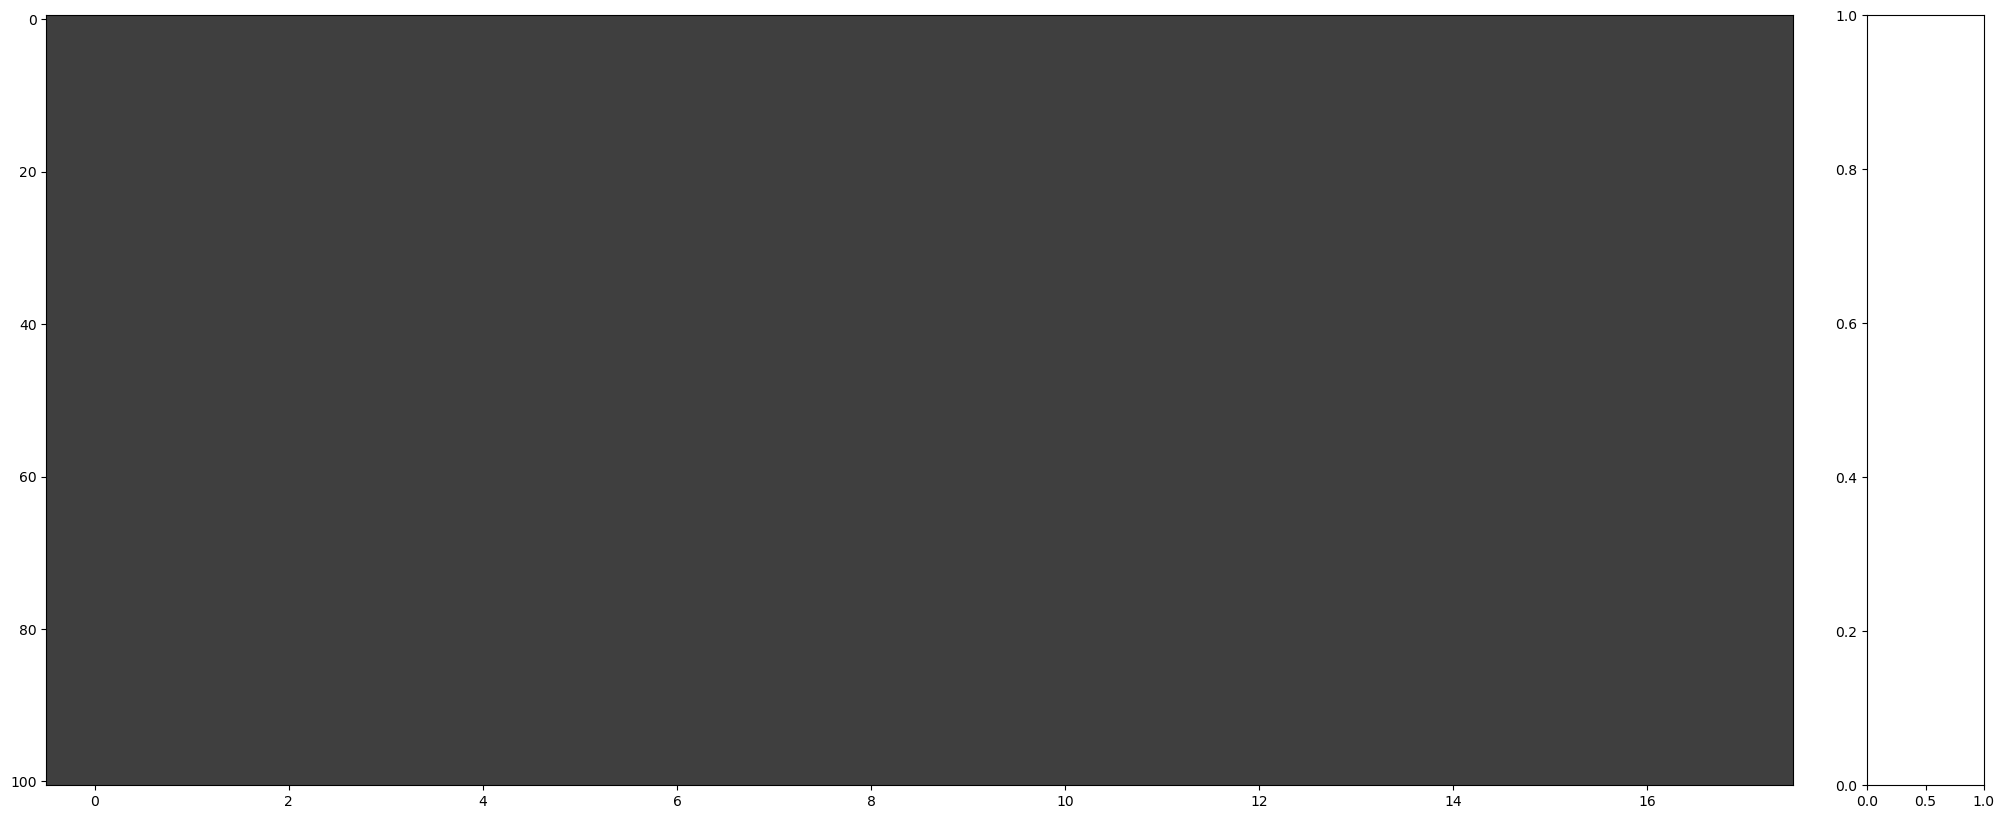

In [3]:
# Stampiamo le informazioni di tipo, presenza di dati nulli, nome e numero della colonna del dataframe
print(zoo_data.info())
# Valutiamo per ogni colonna del dataframe quanti elementi unici sono presenti
print(zoo_data.nunique())
# Verifichiamo che non ci siano elementi mancanti all'interno delle singole colonne del dataframe 
# e facciamo un bar plot perentuale
zoo_data.isnull().sum(axis=0)/zoo_data.shape[0]
# import missingno as msno
# msno.matrix(zoo_data)

In [ ]:
# Abbiamo contro-verificato che non ci sono elementi mancanti

In [4]:
# Costruiamo il dizionario delle Specie
species_dict =dict(list(enumerate(['mammiferi', 'uccelli', 'rettili', 'pesci', 'anfibi', 'insetti','invertebrati'])))
print(species_dict)

{0: 'mammiferi', 1: 'uccelli', 2: 'rettili', 3: 'pesci', 4: 'anfibi', 5: 'insetti', 6: 'invertebrati'}


# Analisi del Dataset
Analisi della distribuzione dei campioni nei vari cluster e della distribuzione delle singole features all'interno di ogni classe

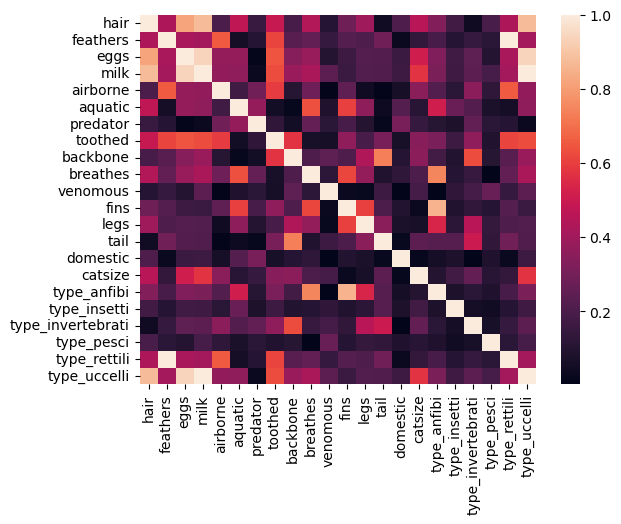

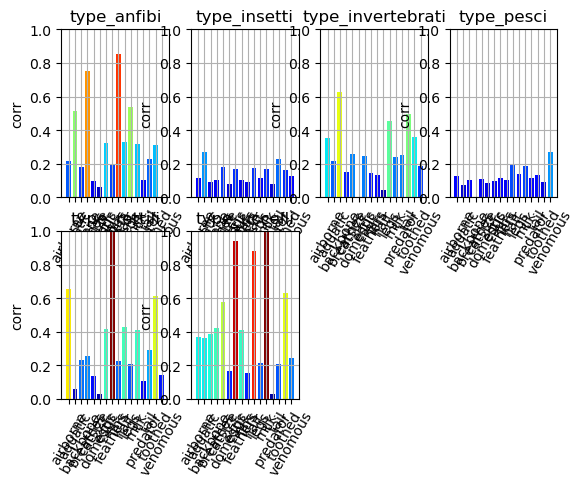

In [5]:
# Computiamo la correlazione tra le varie features e le specifiche classi che compongono il dataset per vedere se ci sono features che hanno una correlazione maggiore
# Grafichiamo il tutto tramite un heatmap e barplot
import seaborn as sns
sf.feature_vs_class_heatmap(zoo_data,species_dict)

In [ ]:
# Dataset composition analysis
sf.class_distributuion_barplot(zoo_data,species_dict)
sf.barplot_class_feature_distribution(zoo_data,species_dict)

# Algoritmi di Clustering

# K-means 

Tale algoritmo richiede di conoscere a priori il numero di cluster totali, classifica i punti dell’input nei vari cluster;
Aggiusta iterativamente la dimensione dei cluster, spostando i punti nei cluster più vicini a loro;
ad ogni iterazione, aggiorna i centroidi dei cluster finché non si raggiunge un criterio di ottimalità.

Si è allenato il modello k-means con l'iperparametro k con valore in [4,10].

In [ ]:
# k-means algorithm
for k in range(4,10,1):
    kmeans=sf.kmeans_prediction(zoo_data.copy(),k)
    result_kmeans=kmeans[['animal name','model_name','type','predict_label','predict']].copy()
    result_kmeans=sf.replace_species(result_kmeans,species_dict)
    scatter_df=sf.scatter_plot_result(kmeans[['animal name','model_name','type','predict_label','predict']].copy())

In [ ]:
## Valutazione cluster
# Labelize result
# Labelize result
result_kmeans=zoo_data[['animal name','type','predict']].copy()
result_kmeans=sf.replace_species(result_kmeans,species_dict)

In [ ]:
# Classification performance
sf.classification_percentage_performance(result_kmeans,species_dict)
 # Similarity index
#similarity_kmeans=sf.similarity_index(result_kmeans)
# Adjusted Rand Index
ari_kmeans=sf.adjusted_rand_index(result_kmeans)
#Rand Index
ri_kmeans=sf.rand_index(result_kmeans)
# Silhouette Score aka Silhouette Coefficient
ss_kmeans=sf.silhouette_score_index(kmeans)
# bar plot of predicted feature class composition
sf.barplot_class_feature_comaprison(kmeans,species_dict)